# Research Skills: Spatiotemporal Data Analysis 
# Lecture 2 - Introduction to Time Series and Univariate Forecasting

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University
Academic Year

(600,)


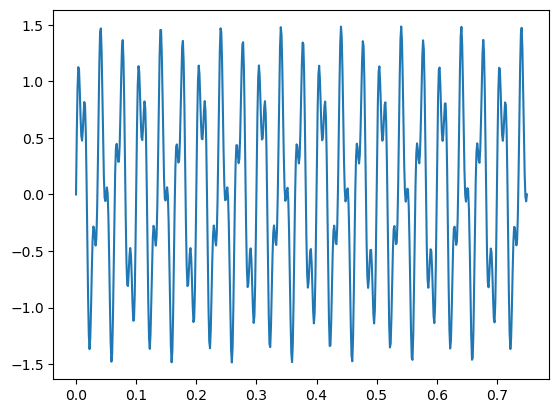

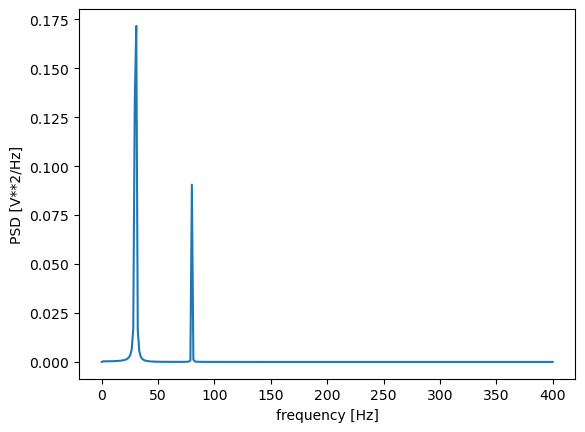

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


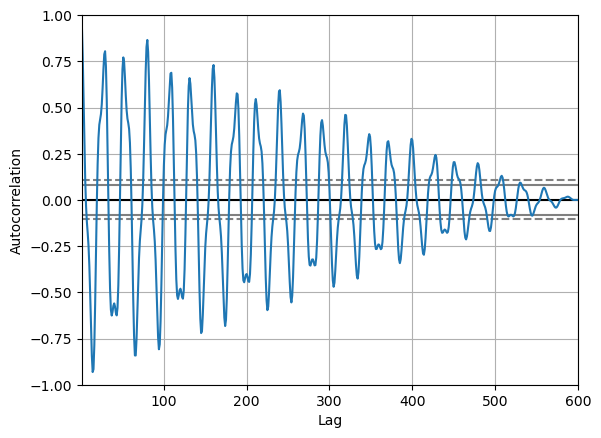

<Figure size 640x480 with 0 Axes>

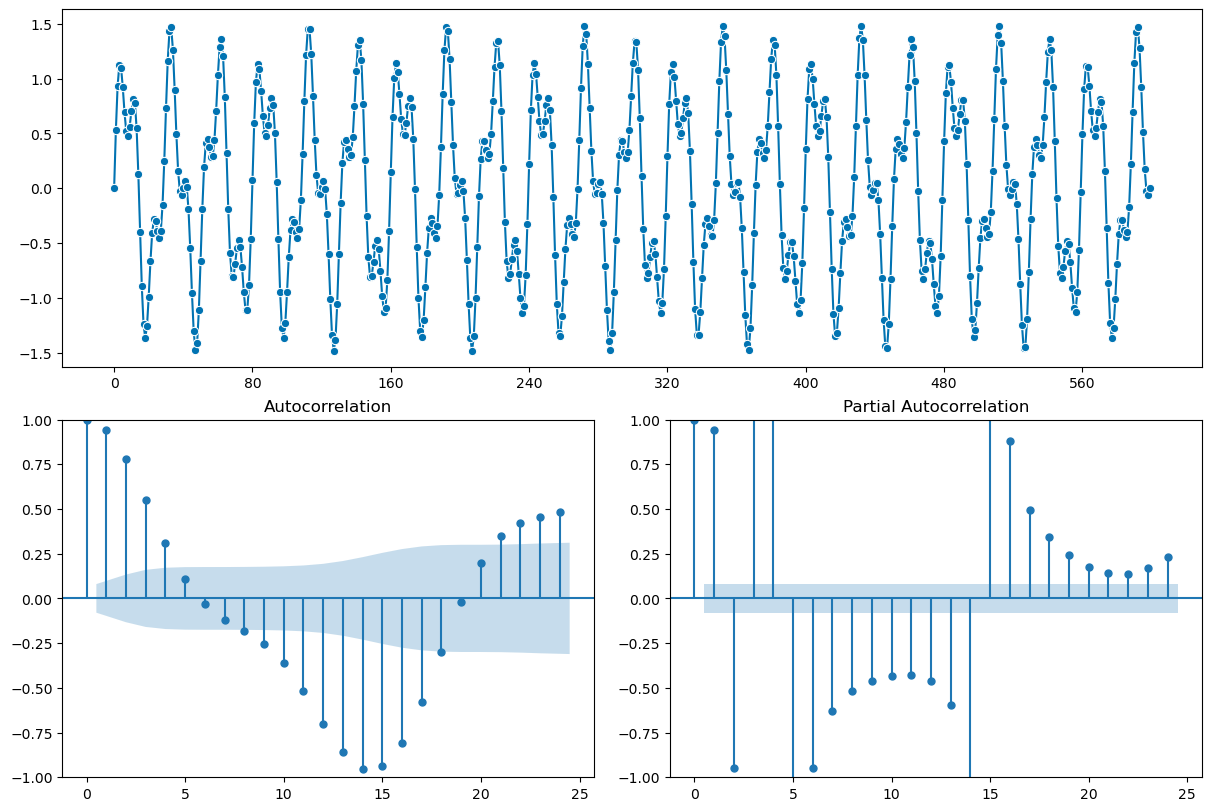

In [1]:
from scipy.fftpack import fft
from pandas.plotting import autocorrelation_plot
from sktime.utils.plotting import plot_correlations
import pandas as pd

import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
%matplotlib inline 

# Number of sample points
N = 600
fs = 800.0
# sample spacing
T = 1.0 /fs
# create 1D dataset of two sine waves at w1 = 30.0 and w2 = 80.0 
x = np.linspace(0.0, N*T, N) 
print(x.shape)
y = np.sin(30.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

f, Pxx_den = signal.periodogram(y, fs)
#
# Your code goes here 
#
plt.figure()
plt.plot(x, y)

fs = 800
plt.figure()

f, Pxx_den = signal.periodogram(y, fs)
#plt.semilogy(f, Pxx_den)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


plt.figure()
autocorrelation_plot(y)

# use the sktime autocorrelation 
plt.figure()
fig, ax = plot_correlations(pd.Series(y))  


In [2]:
#1. Computing the Autoregression 

import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.ndimage.interpolation import shift

#create array
y = np.array([4,3,2,3,2,2,4,6])
y2 = np.array([np.nan,4,3,2,3,2,2,4,6])
y3 = np.array([np.nan,np.nan,4,3,2,3,2,2,4,6])

# retain section which does not have any unknowns 
y = y[2:8]
y2 = y2[2:8]
y3 = y3[2:8]
X = np.stack((y2, y3,), axis=1, out=None)

reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[ 0.8125 -0.9375]
3.5000000000000013


C:\Users\marti\AppData\Local\Temp\ipykernel_5044\82313596.py:5: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


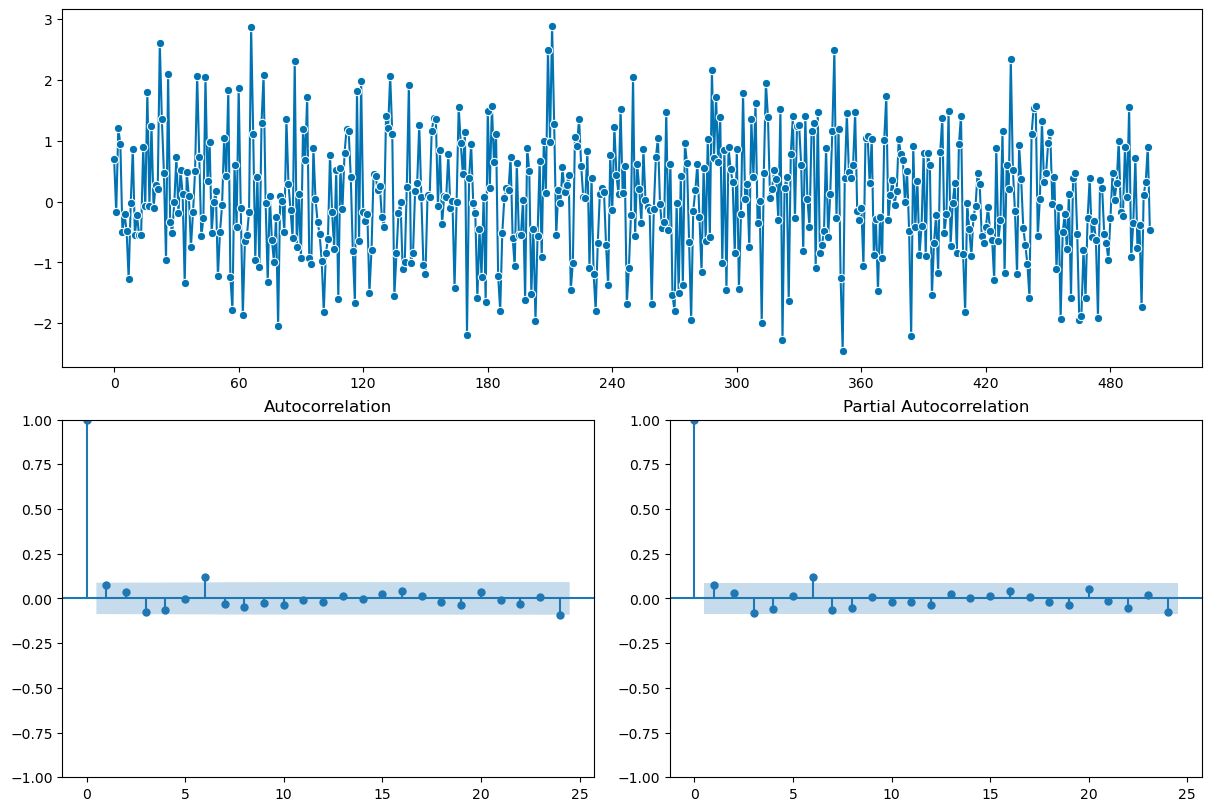

In [3]:
# 2.Displaying the autocorrelation and partial autocorrelation for white noise 


white_noise = np.random.normal(loc = 0, scale = 1, size = 500) 

fig, ax = plot_correlations(pd.Series(white_noise))  


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


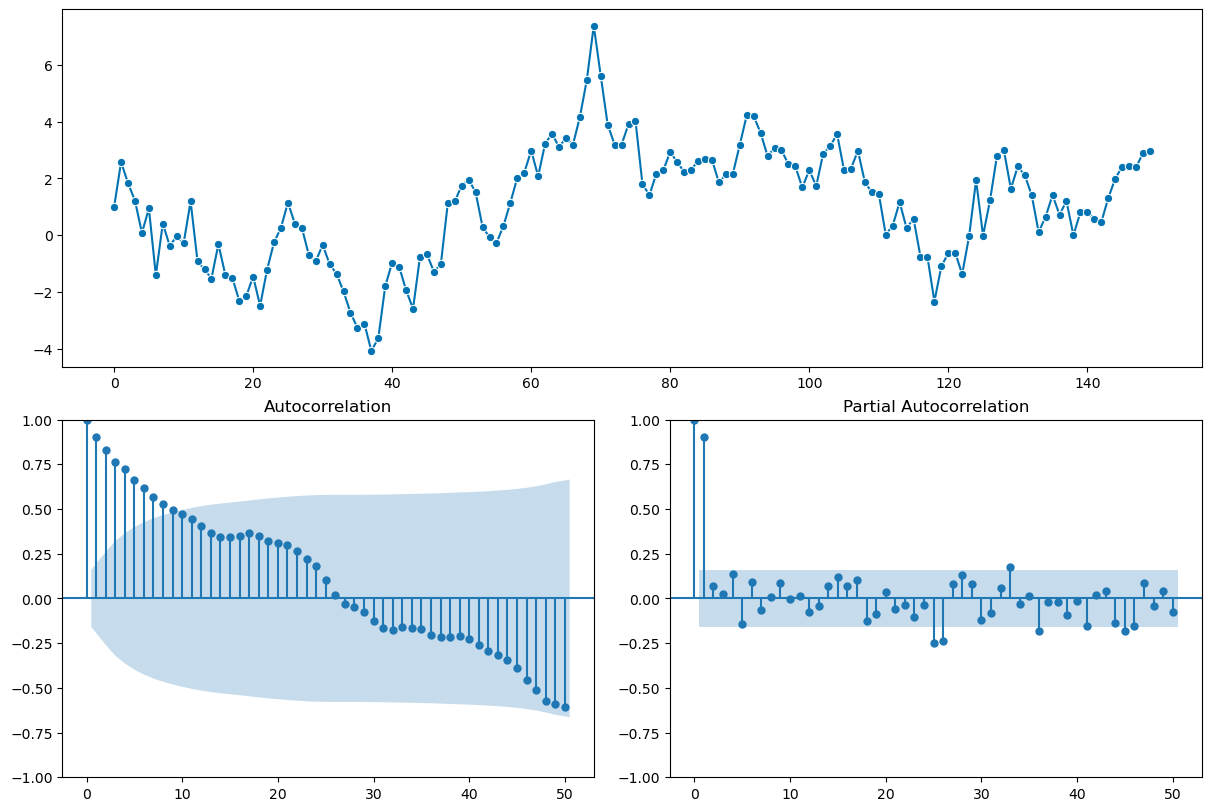

In [4]:
# 3. Displaying the autocorrelation and partial autocorrelation for a 1st order autoregression. 
# set random seed
np.random.seed(1)
# set time length
T = 150
# set intercept
c = 0
# noise term
epsilon = np.random.randn(T)
# create array 
ar_process = np.repeat(1.0, T)
# set coefficient 
p1 =  0.95  #you can modify this to see what happens 
for t in range(T-1):
    ar_process[t+1] = p1*ar_process[t] + c  + epsilon[t]

fig, ax = plot_correlations(pd.Series(ar_process), lags = 50)  


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


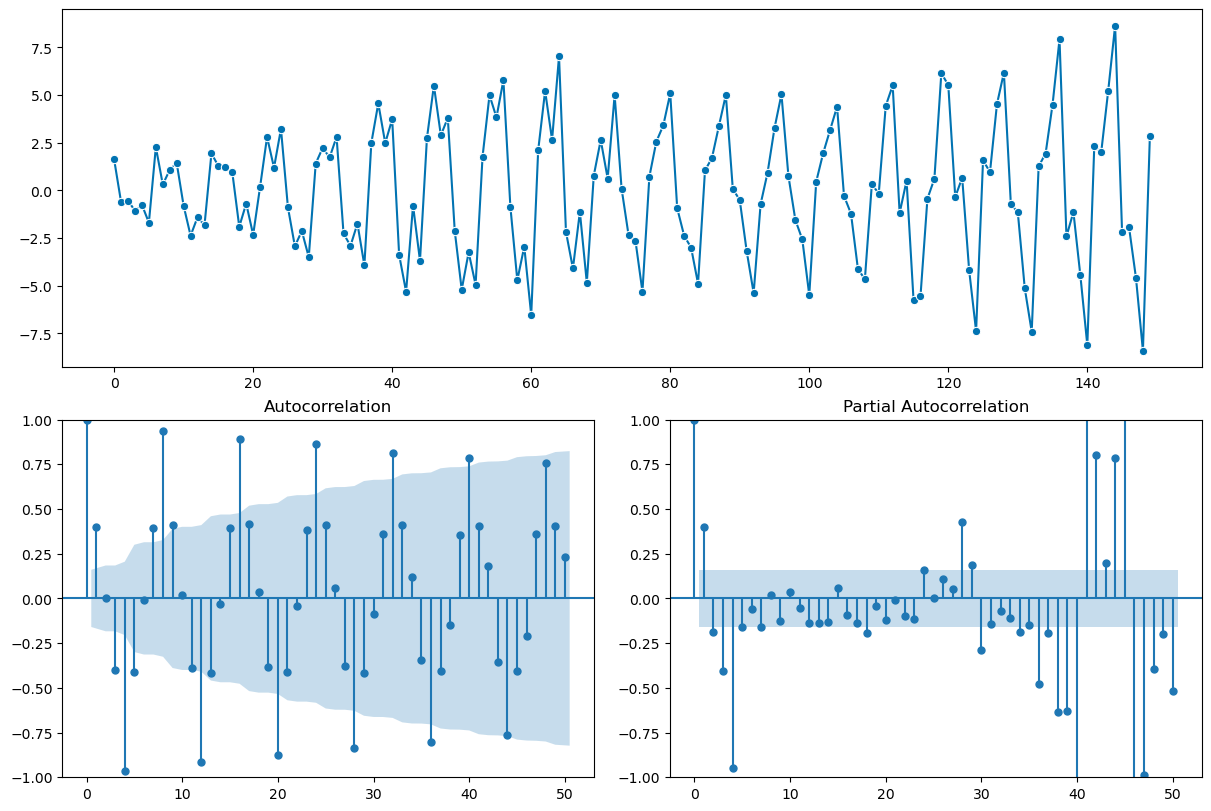

In [6]:
# 4. Autoregression using built in functions in statsmodel 
from statsmodels.tsa.arima_process import ArmaProcess
#plt.subplot(2,1,1)
np.random.seed(1)
ar1 = np.array([1,0,0,0,1])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=150)
fig, ax = plot_correlations(pd.Series(simulated_data_1), lags = 50)  

plt.show()


<Figure size 432x288 with 0 Axes>

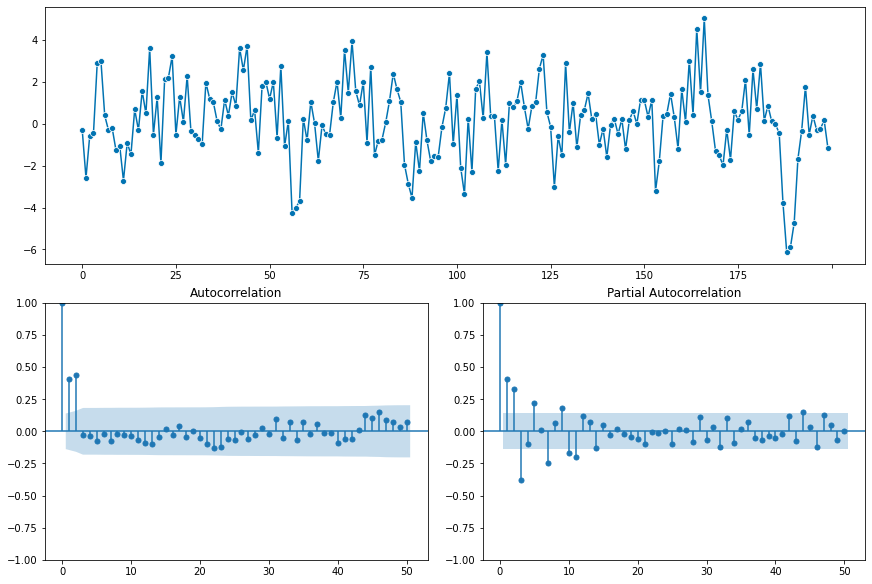

In [6]:
# 5. Generate a moving Average Process with the stats model library
from statsmodels.tsa.arima_process import ArmaProcess

plt.figure()
# coefficents for the 
ar2 = np.array([1])
ma2 = np.array([1,0.5,1.3])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=200)

fig, ax = plot_correlations(pd.Series(simulated_data_2), lags = 50)  



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

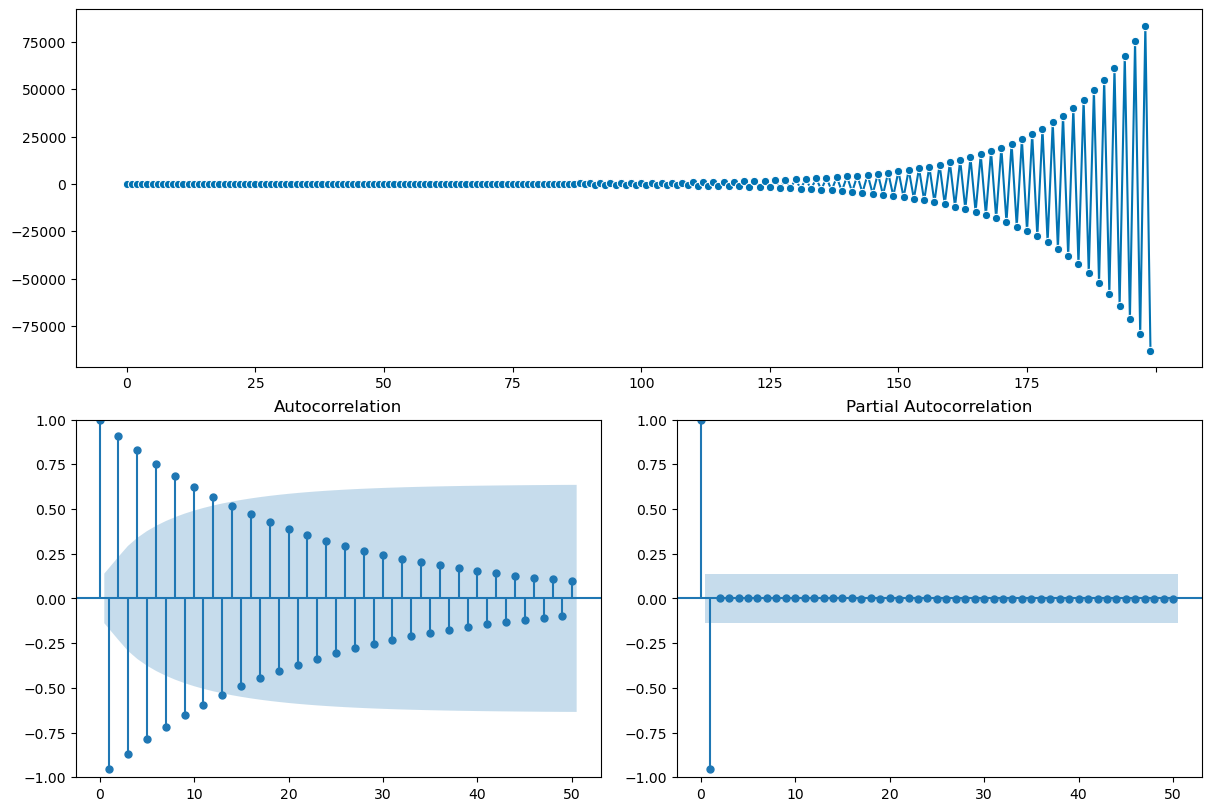

In [7]:
# 6. Generating models with the stats model library 
from statsmodels.tsa.arima_process import ArmaProcess

plt.figure()
ar2 = np.array([1,0.2,-0.9])
ma2 = np.array([1,0.5,0.3])
ARMA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = ARMA_object2.generate_sample(nsample=200)
fig, ax = plot_correlations(pd.Series(simulated_data_2), lags = 50)  
